In [126]:
import pandas as pd 
import numpy as np 
from ucimlrepo import fetch_ucirepo


from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate

## Part A : SVM Implementation

Using a linear kernel

In [127]:
# laoding the dataset and normalising it 
# fetch dataset
spambase = fetch_ucirepo(id=94)


# data (as pandas dataframes)
X = spambase.data.features
y = spambase.data.targets

#normalise X
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [128]:
# Splitting the dataset to train and test 
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=104,train_size=0.8,shuffle=True)

print(X.shape)

(4601, 57)


In [129]:
# training the svm model 

SVM = SVC(kernel='linear')
SVM.fit(X_train,y_train.values.ravel())

SVC(kernel='linear')

In [130]:
# predicting on the training set
y_pred = SVM.predict(X_train)


from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

# get the accuracy

print("Accuracy on the training set : ",accuracy_score(y_train,y_pred))
print()
y_pred = SVM.predict(X_test)

# get the accuracy on the test set
print("Accuracy on the test set : ",accuracy_score(y_test,y_pred))

# get the precision on the test set 
print("Precision on the test set : ",precision_score(y_test,y_pred))

# get the recall
print("Recall on the test set : ",recall_score(y_test,y_pred))

# get the f1 score
print("F1 score on the test set : ",f1_score(y_test,y_pred))

Accuracy on the training set :  0.93125

Accuracy on the test set :  0.9294245385450597
Precision on the test set :  0.9260273972602739
Recall on the test set :  0.898936170212766
F1 score on the test set :  0.9122807017543859


In [131]:
# varying the regularization parameter C

C = [0.01,0.1,1,10,100]
accuracy = []

for c in C:
    SVM = SVC(kernel='linear',C=c)
    SVM.fit(X_train,y_train.values.ravel())
    y_pred = SVM.predict(X_test)
    accuracy.append(accuracy_score(y_test,y_pred))
    

╒══════╤════════════╕
│  C   │  Accuracy  │
╞══════╪════════════╡
│ 0.01 │  0.928339  │
├──────┼────────────┤
│ 0.1  │  0.934853  │
├──────┼────────────┤
│  1   │  0.929425  │
├──────┼────────────┤
│  10  │  0.929425  │
├──────┼────────────┤
│ 100  │  0.931596  │
╘══════╧════════════╛


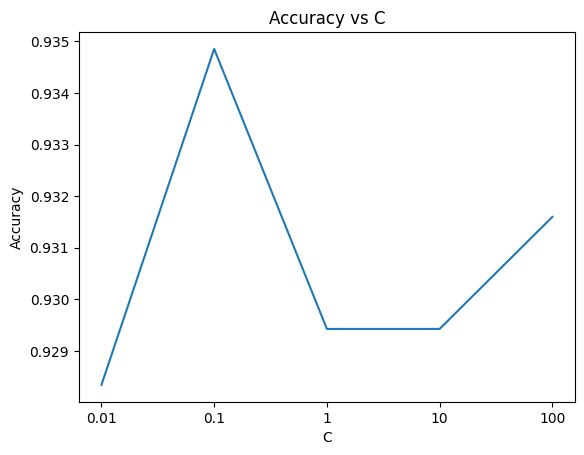

In [132]:
# tabulating the results using tabulate with margin
print(tabulate(zip(C,accuracy),headers=['C','Accuracy'],tablefmt='fancy_grid',numalign='center',stralign='center'))


# plotting the accuracy vs C
import matplotlib.pyplot as plt

default_C_ticks = range(len(C))
plt.plot(default_C_ticks, accuracy)
plt.xticks(default_C_ticks, C)


plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("Accuracy vs C")
plt.show()


## Part B : Kernel Tricks

Using 4 different kernels : 
1. Polynomial with degree 2
2. Polynomial with degree 3
3. Sigmoid
4. Radial Basis Function (RBF)


In [133]:
# polynomial kernel of degree 2
SVM = SVC(kernel='poly',degree=2)
SVM.fit(X_train,y_train.values.ravel())


y_pred = SVM.predict(X_test)

print("For polynomial kernel of degree 2 :")
# get the accuracy on the test set
print("Accuracy on the test set : ",accuracy_score(y_test,y_pred))

# get the precision on the test set
print("Precision on the test set : ",precision_score(y_test,y_pred))

# get the recall
print("Recall on the test set : ",recall_score(y_test,y_pred))

# get the f1 score
print("F1 score on the test set : ",f1_score(y_test,y_pred))



For polynomial kernel of degree 2 :
Accuracy on the test set :  0.8382193268186754
Precision on the test set :  0.952191235059761
Recall on the test set :  0.6356382978723404
F1 score on the test set :  0.7623604465709729


In [134]:
# polynomial kernel of degree 3
SVM = SVC(kernel='poly',degree=3)
SVM.fit(X_train,y_train.values.ravel())


y_pred = SVM.predict(X_test)

print("For polynomial kernel of degree 3 :")
# get the accuracy on the test set
print("Accuracy on the test set : ",accuracy_score(y_test,y_pred))

# get the precision on the test set
print("Precision on the test set : ",precision_score(y_test,y_pred))

# get the recall
print("Recall on the test set : ",recall_score(y_test,y_pred))

# get the f1 score
print("F1 score on the test set : ",f1_score(y_test,y_pred))



For polynomial kernel of degree 3 :
Accuracy on the test set :  0.7752442996742671
Precision on the test set :  0.9470899470899471
Recall on the test set :  0.47606382978723405
F1 score on the test set :  0.6336283185840708


In [135]:
# Sigmod kernel 
SVM = SVC(kernel='sigmoid')
SVM.fit(X_train,y_train.values.ravel())


y_pred = SVM.predict(X_test)

print("For Sigmoid Function :")
# get the accuracy on the test set
print("Accuracy on the test set : ",accuracy_score(y_test,y_pred))

# get the precision on the test set
print("Precision on the test set : ",precision_score(y_test,y_pred))

# get the recall
print("Recall on the test set : ",recall_score(y_test,y_pred))

# get the f1 score
print("F1 score on the test set : ",f1_score(y_test,y_pred))



For Sigmoid Function :
Accuracy on the test set :  0.8957654723127035
Precision on the test set :  0.8804347826086957
Recall on the test set :  0.8617021276595744
F1 score on the test set :  0.870967741935484


In [136]:
# rbf kernel
SVM = SVC(kernel='rbf')
SVM.fit(X_train,y_train.values.ravel())


y_pred = SVM.predict(X_test)

print("For Radial Basis Function :")
# get the accuracy on the test set
print("Accuracy on the test set : ",accuracy_score(y_test,y_pred))

# get the precision on the test set
print("Precision on the test set : ",precision_score(y_test,y_pred))

# get the recall
print("Recall on the test set : ",recall_score(y_test,y_pred))

# get the f1 score
print("F1 score on the test set : ",f1_score(y_test,y_pred))



For Radial Basis Function :
Accuracy on the test set :  0.9391965255157437
Precision on the test set :  0.949438202247191
Recall on the test set :  0.898936170212766
F1 score on the test set :  0.9234972677595629


## Part C : Overfitting and Underfitting Analysis 

We try the SVM on the following experiment : 

| Experiment | Polynomial Deg | Parameter C |
| :--------: | :------------: | :---------: |
| 1 | 1 | 0.01 |
| 2 | 1 | 100 |
| 3 | 3 | 0.01 |
| 4 | 3 | 100 |  

In [137]:
train_accuracy = []
test_accuracy = []
X = ["Exp1","Exp2","Exp3","Exp4"]

In [138]:
# Experiment 1 
# C=0.01 and linear kernel
SVM = SVC(kernel='linear',C=0.01)
SVM.fit(X_train,y_train.values.ravel()) 

#accuracy on training data
y_pred = SVM.predict(X_train)
train_accuracy.append(accuracy_score(y_train,y_pred))

# accuracy on test data
y_pred = SVM.predict(X_test)
test_accuracy.append(accuracy_score(y_test,y_pred))



In [139]:
# Experiment 2
# C = 100 and linear kernel
SVM = SVC(kernel='linear',C=100)
SVM.fit(X_train,y_train.values.ravel())

#accuracy on training data
y_pred = SVM.predict(X_train)
train_accuracy.append(accuracy_score(y_train,y_pred))

# accuracy on test data
y_pred = SVM.predict(X_test)
test_accuracy.append(accuracy_score(y_test,y_pred))


In [140]:
# Experiment 3
# C = 0.01 and polynomial kernel of degree 3
SVM = SVC(kernel='poly',C=0.01,degree=3)
SVM.fit(X_train,y_train.values.ravel())

#accuracy on training data
y_pred = SVM.predict(X_train)
train_accuracy.append(accuracy_score(y_train,y_pred))

# accuracy on test data
y_pred = SVM.predict(X_test)
test_accuracy.append(accuracy_score(y_test,y_pred))


In [141]:
# Experiment 4
# C=100 and polynomial kernel of degree 3
SVM = SVC(kernel='poly',C=100,degree=3)
SVM.fit(X_train,y_train.values.ravel())

#accuracy on training data
y_pred = SVM.predict(X_train)
train_accuracy.append(accuracy_score(y_train,y_pred))

# accuracy on test data
y_pred = SVM.predict(X_test)
test_accuracy.append(accuracy_score(y_test,y_pred))


╒══════════════╤═════════════════════╤════════════════════╕
│  Experiment  │  Training Accuracy  │  Testing Accuracy  │
╞══════════════╪═════════════════════╪════════════════════╡
│     Exp1     │      0.920924       │      0.928339      │
├──────────────┼─────────────────────┼────────────────────┤
│     Exp2     │      0.934239       │      0.931596      │
├──────────────┼─────────────────────┼────────────────────┤
│     Exp3     │      0.639402       │      0.618893      │
├──────────────┼─────────────────────┼────────────────────┤
│     Exp4     │      0.963859       │      0.93051       │
╘══════════════╧═════════════════════╧════════════════════╛


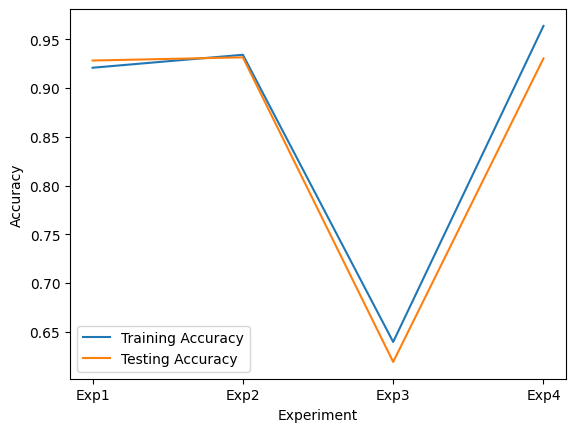

In [142]:
# tabulating the results using tabulate
print(tabulate(zip(X,train_accuracy,test_accuracy),headers=['Experiment','Training Accuracy','Testing Accuracy'],tablefmt='fancy_grid',numalign='center',stralign='center'))

# Plotting the training accuracy vs Experiment

default_C_ticks1 = range(len(X))
plt.plot(default_C_ticks1, train_accuracy)
plt.xticks(default_C_ticks1, X)
plt.xlabel("Experiment")
plt.ylabel("Accuracy")

# Plotting the test accuracy vs Experiment
default_C_ticks2 = range(len(X))
plt.plot(default_C_ticks2, test_accuracy)
plt.xticks(default_C_ticks2, X)
plt.legend(["Training Accuracy","Testing Accuracy"])
plt.show()



We see from the table that for a linear kernel , the svm model performs well with a low or high regularisation parameter , so the linear kernel is actually able to well fit the training set , and even generalises well to unseen data (as observed from the test accuracy)

Further we see that in the case of polynomial kernel of deg 3 , the model performs well with high regularisation parameter but poorly with low regualrisation parameter value . From this we can infer that the polynomial kernel tends to overfit the data , and the this is why it has poor generalising ability . So if we restrict this overfitting by using a high regularisation parameter , we may not better fit the training set , but we still achieve better generalisation and thats why it performs better on the test set.